## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report , precision_score , recall_score 
from sklearn.metrics import f1_score , roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

In [2]:
engine =create_engine('sqlite:///../Data/Earthquakedata.db')
df_features = pd.read_sql_table('Earthquake_features',con=engine)

In [3]:
df_features.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
0,2020-07-13,35.180000,1.89,Hawaii,19.282855,-155.420908,24.959545,21.068666,16.174286,1.882727,1.890000,1.920000,0
1,2020-07-13,34.720001,1.82,Hawaii,19.282855,-155.420908,24.927727,21.118000,16.091429,1.883636,1.894667,1.920000,0
2,2020-07-13,31.690000,1.80,Hawaii,19.282855,-155.420908,24.869545,22.660000,20.424286,1.880000,1.906000,1.897143,0
3,2020-07-13,31.270000,2.12,Hawaii,19.282855,-155.420908,24.959091,22.610667,20.035714,1.891818,1.930000,1.941429,0
4,2020-07-13,32.459999,1.84,Hawaii,19.282855,-155.420908,25.037273,22.726667,23.692857,1.898182,1.936667,1.934286,0


In [4]:
engine =create_engine('sqlite:///../Data/Earthquakedata_predict.db')
df_predict = pd.read_sql_table('Earthquake_predict',con=engine)

In [5]:
df_predict.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
0,2020-08-10,11.240000,1.87,Hawaii,19.282855,-155.420908,19.182728,17.396667,24.788572,1.959545,1.938000,1.921429,NaN
1,2020-08-11,-1.590000,1.75,Hawaii,19.282855,-155.420908,19.186364,15.003334,19.727143,1.953636,1.931333,1.884286,NaN
2,2020-08-11,32.650002,1.83,Hawaii,19.282855,-155.420908,19.218637,15.030667,19.285715,1.949091,1.929333,1.884286,NaN
3,2020-08-11,5.220000,2.35,Hawaii,19.282855,-155.420908,18.016819,15.440000,15.481429,1.951818,1.969333,1.904286,NaN
4,2020-08-11,31.200001,1.91,Hawaii,19.282855,-155.420908,17.865909,17.564000,20.148572,1.955000,1.975333,1.911429,NaN


In [6]:
df_features.corr()

,depth,mag,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
depth,1.000000,0.278466,0.202360,-0.063632,0.527454,0.542260,0.592521,0.290979,0.294193,0.284368,0.109862
mag,0.278466,1.000000,-0.121868,0.234775,0.357137,0.347809,0.333498,0.626944,0.643076,0.687991,0.425453
latitude,0.202360,-0.121868,1.000000,-0.685324,0.340756,0.338255,0.320218,-0.188379,-0.184497,-0.174877,-0.346577
longitude,-0.063632,0.234775,-0.685324,1.000000,-0.057050,-0.063967,-0.074446,0.361475,0.354099,0.336510,0.526973
depth_avg_22,0.527454,0.357137,0.340756,-0.057050,1.000000,0.972190,0.885714,0.572140,0.556201,0.517596,0.233188
depth_avg_15,0.542260,0.347809,0.338255,-0.063967,0.972190,1.000000,0.913908,0.555402,0.548034,0.508507,0.221834
depth_avg_7,0.592521,0.333498,0.320218,-0.074446,0.885714,0.913908,1.000000,0.501064,0.499317,0.485335,0.194571
mag_avg_22,0.290979,0.626944,-0.188379,0.361475,0.572140,0.555402,0.501064,1.000000,0.979417,0.914283,0.627259
mag_avg_15,0.294193,0.643076,-0.184497,0.354099,0.556201,0.548034,0.499317,0.979417,1.000000,0.939791,0.615680
mag_avg_7,0.284368,0.687991,-0.174877,0.336510,0.517596,0.508507,0.485335,0.914283,0.939791,1.000000,0.589752


In [7]:
features = [f for f in list(df_features) if f not in ['date', 'lon_box_mean',
 'lat_box_mean', 'mag_outcome', 'mag', 'place',
 'combo_box_mean',  'latitude',
 'longitude']]

In [8]:
features

['depth',
 'depth_avg_22',
 'depth_avg_15',
 'depth_avg_7',
 'mag_avg_22',
 'mag_avg_15',
 'mag_avg_7']

In [9]:
X=df_features[features]

In [10]:
X

,depth,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7
0,35.180000,24.959545,21.068666,16.174286,1.882727,1.890000,1.920000
1,34.720001,24.927727,21.118000,16.091429,1.883636,1.894667,1.920000
2,31.690000,24.869545,22.660000,20.424286,1.880000,1.906000,1.897143
3,31.270000,24.959091,22.610667,20.035714,1.891818,1.930000,1.941429
4,32.459999,25.037273,22.726667,23.692857,1.898182,1.936667,1.934286
...,...,...,...,...,...,...,...
12670,10.000000,46.795000,49.840000,39.214286,1.820000,1.933333,1.985714
12671,19.100000,46.813182,51.113333,40.785714,1.842727,1.893333,1.985714
12672,32.100000,47.267727,52.873333,35.785714,1.797273,1.866667,1.885714
12673,15.000000,46.958636,51.553333,37.585714,1.810909,1.866667,1.771429


In [11]:
y=df_features["mag_outcome"]

In [12]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12670    0
12671    0
12672    0
12673    0
12674    0
Name: mag_outcome, Length: 12675, dtype: int64

In [13]:
y_df=pd.DataFrame(y)

## Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_features[features],
                     df_features['mag_outcome'], test_size=0.3, random_state=42)


Models used for training:

- Adaboost classifier with DecisionTree
- Adaboost classifier with RandomForest
- GridSearch CV for hyper parameter tunning

Model for deployment/testing:

- XgBoost with Hyperparameters set from above models


## AdaBoost 

#### AdaBoost + Decsion Tree Classifier

In [15]:
param_grid = {
              "base_estimator__max_depth" :   [2,5,7],
              "n_estimators": [200, 400, 600]
             }

In [16]:
# base estimator
tree = DecisionTreeClassifier()

In [17]:
# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6,
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [18]:
# run grid search
grid_search_ABC = GridSearchCV(ABC,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [19]:
grid_search_ABC.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             param_grid={'base_estimator__max_depth': [2, 5, 7],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [20]:
pred_ABC=grid_search_ABC.predict(X_test)

In [21]:
print("Train Accuracy:",grid_search_ABC.score(X_train, y_train)*100,"%")
print("Test Accuracy:",grid_search_ABC.score(X_test, y_test)*100,"%")
print("Precision Score: ",precision_score(y_test, pred_ABC))
print("Recall Score: ",recall_score(y_test, pred_ABC)) 
print("F1 Score: ",f1_score(y_test, pred_ABC))

Train Accuracy: 100.0 %
Test Accuracy: 98.44659250983631 %
Precision Score:  0.8782051282051282
Recall Score:  0.8058823529411765
F1 Score:  0.8404907975460123


In [22]:
print("Confusion Matrix: ")
cm_abc=confusion_matrix(y_test, pred_ABC)
print(cm_abc)

Confusion Matrix: 
[[3614   19]
 [  33  137]]


AUC: 0.9003


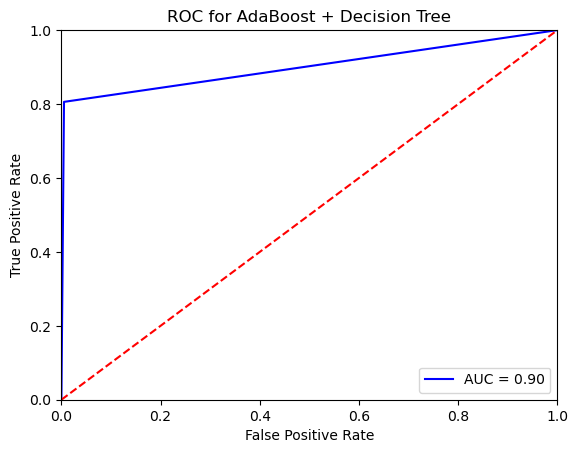

In [23]:
fpr, tpr, _ = roc_curve(y_test, pred_ABC)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))
plt.title('ROC for AdaBoost + Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AdaBoost with Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

In [25]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [26]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [27]:
pred=CV_rfc.predict(X_test)

In [28]:
print("Train Accuracy:",CV_rfc.score(X_train, y_train)*100,"%")
print("Test Accuracy:",CV_rfc.score(X_test, y_test)*100,"%")
print("Precision Score: ",precision_score(y_test, pred))
print("Recall Score: ",recall_score(y_test, pred)) 
print("F1 Score: ",f1_score(y_test, pred))

Train Accuracy: 100.0 %
Test Accuracy: 98.76413357875361 %
Precision Score:  0.8867924528301887
Recall Score:  0.8294117647058824
F1 Score:  0.8571428571428571


In [29]:
print("Confusion Matrix: ")
cm_abc_rf=confusion_matrix(y_test, pred)
print(cm_abc_rf)

Confusion Matrix: 
[[3615   18]
 [  29  141]]


AUC: 0.9122


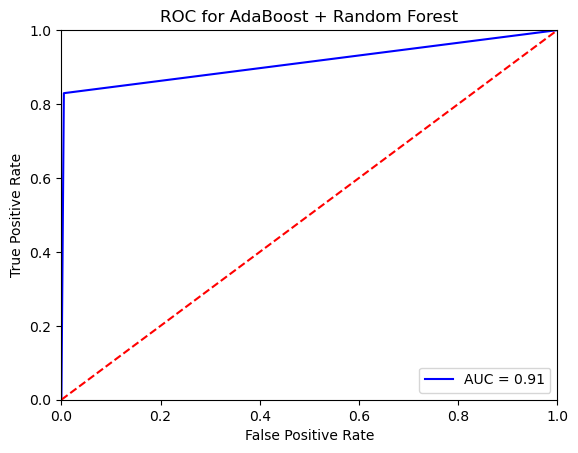

In [30]:
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))
plt.title('ROC for AdaBoost + Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XgBoost

In [31]:
dtrain = xgb.DMatrix(X_train[features], label=y_train)
dtest = xgb.DMatrix(X_test[features], label=y_test)

In [32]:
param = {
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'eval_metric': 'auc',
        'max_depth': 6,  # the maximum depth of each tree
        'eta': 0.003,  # the training step for each iteration
        'silent': 1}  # logging mode - quiet}  # the number of classes that exist in this datset
num_round = 5000  # the number of training iterations 

In [33]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

[19:08:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [34]:
print (roc_auc_score(y_test, preds))
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

0.9841178089733004
AUC: 0.9841


In [35]:
ypred_bst = np.array(bst.predict(dtest,ntree_limit=bst.best_iteration))
ypred_bst  = ypred_bst > 0.5
ypred_bst = ypred_bst.astype(int) 

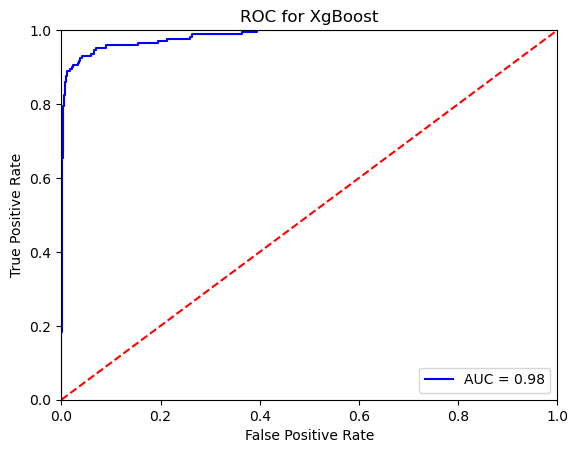

In [36]:
plt.title('ROC for XgBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
print("Confusion Matrix: \n",confusion_matrix(y_test,ypred_bst))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,ypred_bst))

Confusion Matrix: 
 [[3613   20]
 [  31  139]]

Recall 'TP/TP+FN' =  0.8176470588235294


### Prediction on df_predict data frame

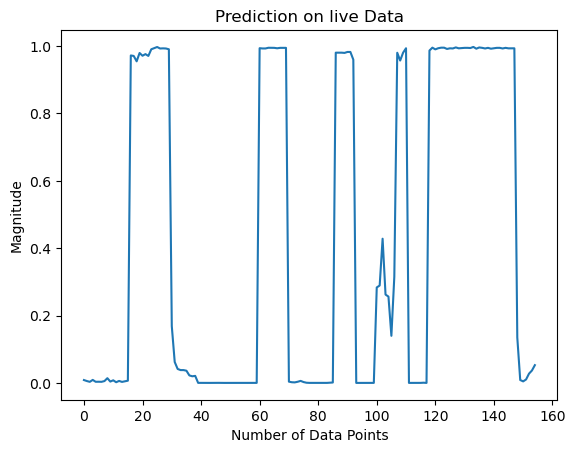

In [38]:
dlive = xgb.DMatrix(df_predict[features]) #, label=[])
preds = bst.predict(dlive)

plt.title("Prediction on live Data")
plt.ylabel("Magnitude")
plt.xlabel("Number of Data Points")
plt.plot(preds)
plt.show()

## Prediction

In [39]:
live_set = df_predict[['date', 'place', 'latitude', 'longitude']]
live_set.loc[:,'quake'] = preds
# aggregate down dups
live_set = live_set.groupby(['date', 'place'], as_index=False).mean()

# increment date to include DAYS_OUT_TO_PREDICT
live_set['date']= pd.to_datetime(live_set['date'],format='%Y-%m-%d') 
live_set['date'] = live_set['date'] + pd.to_timedelta(7,unit='d')

live_set.tail()

,date,place,latitude,longitude,quake
75,2020-08-18,Hawaii,19.282855,-155.420908,0.004712
76,2020-08-18,Indonesia,-4.186166,119.931170,0.990494
77,2020-08-18,Nevada,38.177047,-117.932016,0.000145
78,2020-08-18,Philippines,7.507142,125.354826,0.993335
79,2020-08-18,Puerto Rico,17.974638,-66.897354,0.973406


In [40]:
import datetime as dt
# convert date to proper format for prediction
days = list(set([d for d in live_set['date'].astype(str)]))
days.sort()

In [41]:
days

['2020-08-05',
 '2020-08-06',
 '2020-08-07',
 '2020-08-08',
 '2020-08-09',
 '2020-08-10',
 '2020-08-11',
 '2020-08-12',
 '2020-08-13',
 '2020-08-14',
 '2020-08-15',
 '2020-08-16',
 '2020-08-17',
 '2020-08-18']

In [42]:
# Predict NaN outcome value in earthquake for next day 1.
predict_day=days[2]
predict_day

'2020-08-07'

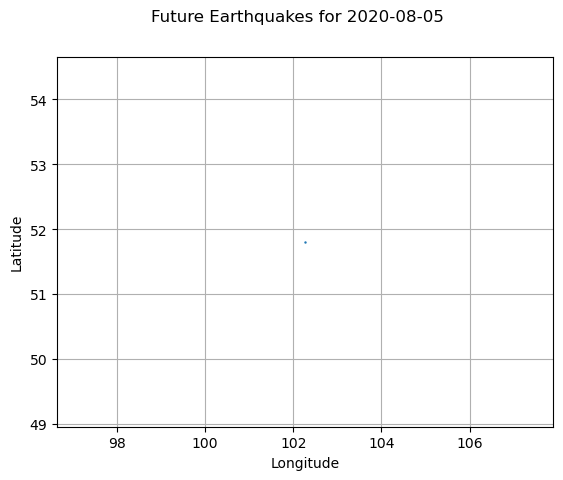

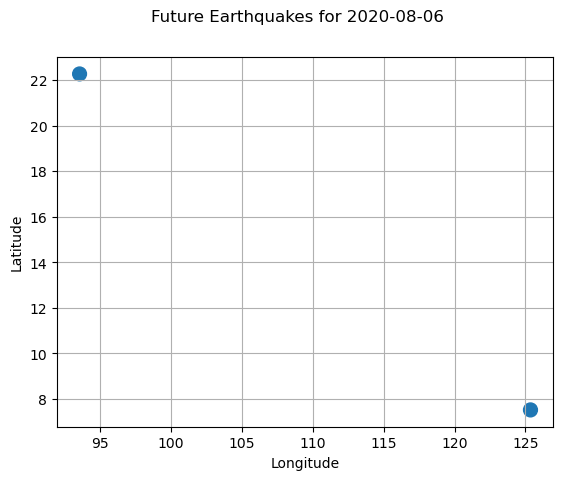

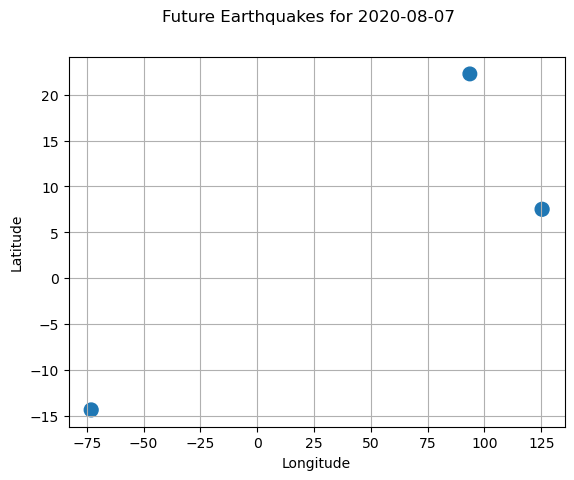

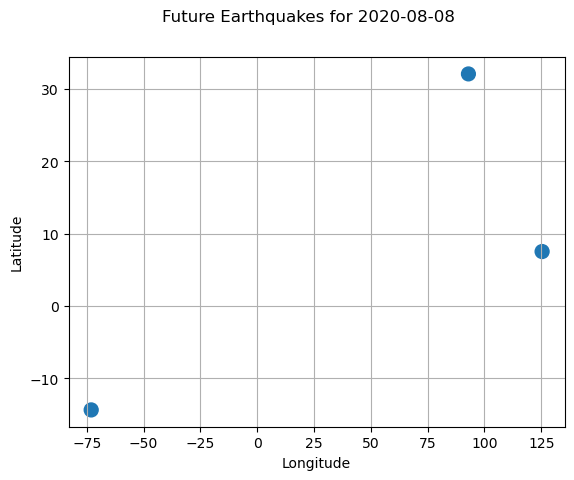

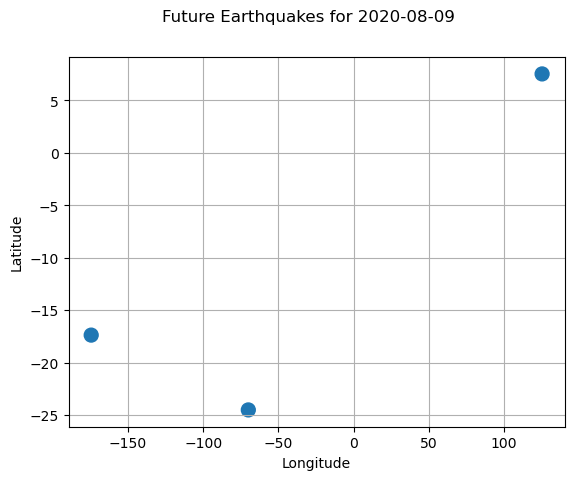

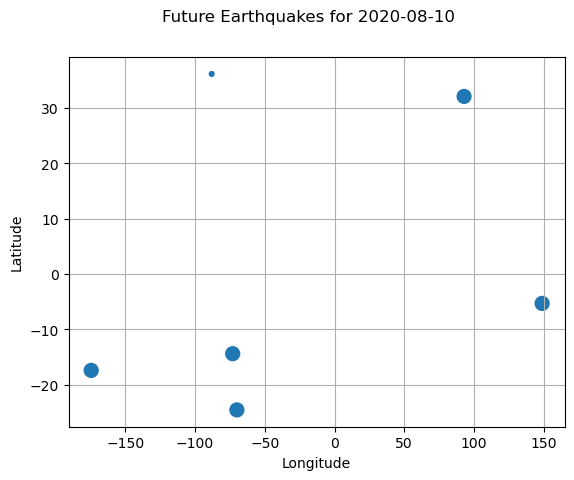

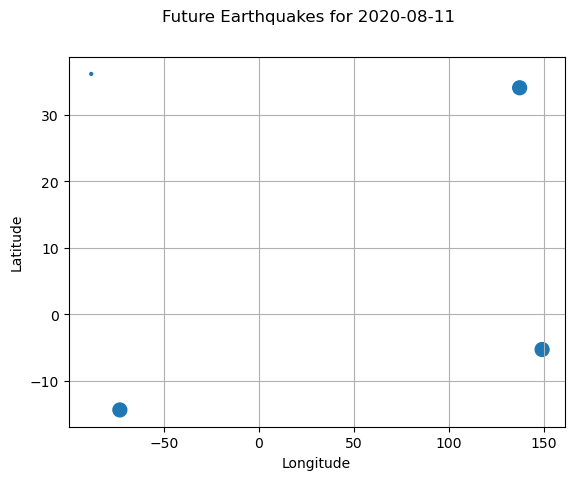

In [43]:
# place, date, lat and long with earthquake probability for next 7 days
for i in range(0,7):
    live_set_tmp = live_set[live_set['date'] == days[i]]
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['quake'] * 100))
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()